1. 플릭커 API를 통한 이미지 수집 및 라벨링 
 - www.flickr.com
 - Yahoo.com 계정 생성 후에 Flickr API 페이지에 들어가서 생성
 - https://www.flickr.com/services/api

 - 화면 상단의 App 제작 또는 Create APP 클릭->비상업용 키 신청->App 이름 및 설명 입력 후 등록(submit)
 - key, secret을 보관

In [ ]:
!pip install flickrapi

     |████████████████████████████████| 54 kB 1.9 MB/s 


- 원하는 종류의 사진별 수집, 각각의 폴더에 이미지 저장
 - 첫 번째 범주에 해당하는 이미지 수집

In [ ]:
from flickrapi import FlickrAPI
from urllib.request import urlretrieve
from pprint import pprint
import os, time, sys

key="6bfa70412aa62e9bcc133e106d4b85ad"
secret="ba712990d15368ca"

wait_time=1

#사진 검색 및 저장
savedir="sushi"
if not os.path.exists(savedir):
 os.mkdir(savedir)

#API로 다운로드
flickr = FlickrAPI(key, secret, format="parsed-json")
res=flickr.photos.search( text="스시", per_page=100, media="photos", sort="relevance", safe_search=1, extras="url_q, license")

photos=res['photos']
pprint(photos)

- 이미지 url로 이미지 저장
- 2개 이상의 키워드로 플릭커에서 위의 코드를 이용하셔서 이미지를 수집해보세요.


In [ ]:
try: 
 for i , photo in enumerate(photos['photo']):
  url_q = photo['url_q']
  filepath = savedir+'/'+photo['id']+'.jpg'
  if os.path.exists(filepath):continue
  print(str(i+1)+":download=", url_q)
  urlretrieve(url_q, filepath)
  time.sleep(wait_time)
except:
 import traceback
 traceback.print_exc()


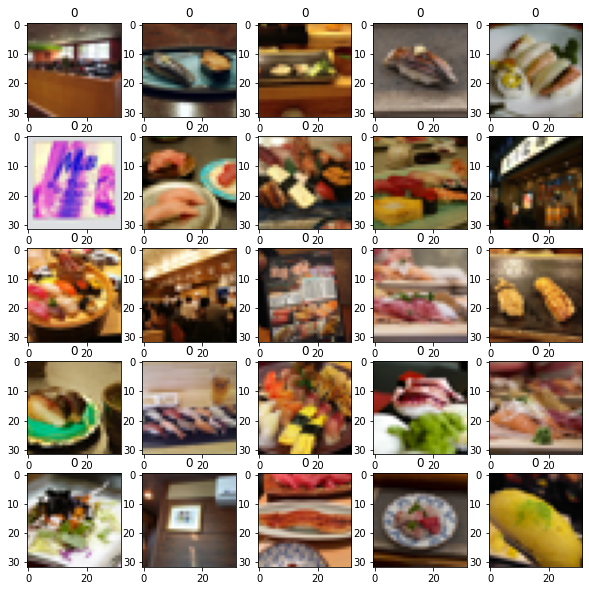

In [ ]:
#flick 사진 처리
import numpy as np
from PIL import Image
import os, glob, random

max_photo = 100
photo_size=32
x=[]
y=[]

files = glob.glob( "sushi"+"/*.jpg")
random.shuffle(files)

num=0

for f in files:
 if num >= max_photo: break
 num +=1
 img = Image.open(f)
 img= img.convert("RGB")
 img= img.resize((photo_size, photo_size))
 img= np.asarray(img)
 x.append(img)
 y.append(0)	#label을 0으로 지정


#이미지 출력
import matplotlib.pyplot as plt
idx = 0
plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5,5,i+1)
 plt.title(y[i+idx])
 plt.imshow(x[i+idx])
plt.show()



  - 두 번째 범주의 이미지 수집

In [ ]:
from flickrapi import FlickrAPI
from urllib.request import urlretrieve
from pprint import pprint
import os, time, sys

key="6bfa70412aa62e9bcc133e106d4b85ad"
secret="ba712990d15368ca"

wait_time=1

#사진 검색 및 저장
savedir="udon"
if not os.path.exists(savedir):
 os.mkdir(savedir)

#API로 다운로드
flickr = FlickrAPI(key, secret, format="parsed-json")
res=flickr.photos.search( text="우동", per_page=100, media="photos", sort="relevance", safe_search=1, extras="url_q, license")

photos=res['photos']
pprint(photos)

In [ ]:
try: 
 for i , photo in enumerate(photos['photo']):
  url_q = photo['url_q']
  filepath = savedir+'/'+photo['id']+'.jpg'
  if os.path.exists(filepath):continue
  print(str(i+1)+":download=", url_q)
  urlretrieve(url_q, filepath)
  time.sleep(wait_time)
except:
 import traceback
 traceback.print_exc()


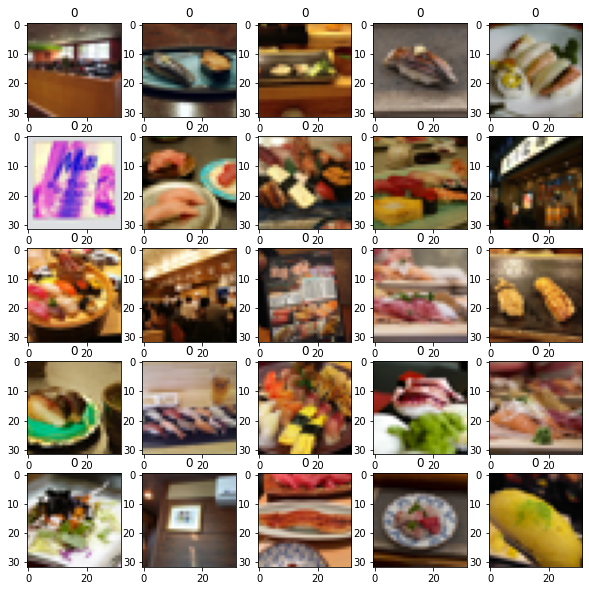

In [ ]:
#flick 사진 처리
max_photo = 100
photo_size=32

files = glob.glob( "udon"+"/*.jpg")
random.shuffle(files)

num=0

for f in files:
 if num >= max_photo: break
 num +=1
 img = Image.open(f)
 img= img.convert("RGB")
 img= img.resize((photo_size, photo_size))
 img= np.asarray(img)
 x.append(img)
 y.append(1)	#label을 0으로 지정


#이미지 출력
import matplotlib.pyplot as plt
idx = 0
plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5,5,i+1)
 plt.title(y[i+idx])
 plt.imshow(x[i+idx])
plt.show()



In [ ]:
x = np.array(x)
y = np.array(y)
x.shape
y.shape

(200,)

3. DNN 적용하기

In [ ]:
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

num_classes = 2
im_rows = 32
im_cols = 32
im_size = im_rows * im_cols * 3

# 데이터 읽어 들이기 
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3)


In [ ]:
# 데이터를 1차원 배열로 변환하기
X_train = X_train.reshape(-1, im_size).astype('float32') / 255 #평탄화->소숫점있는숫자->스케일링
X_test = X_test.reshape(-1, im_size).astype('float32') / 255
# 타겟변수를 One-hot 형식으로 변환하기
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

X_train.shape
y_train.shape

(140, 2)

In [ ]:
#실행 전 GPU 설정
# 모델 정의하기 
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(im_size,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일하기 
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 학습 실행하기 
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=10,
    verbose=1,
    validation_data=(X_test, y_test))



Epoch 1/10
5/5 [==============================] - 1s 98ms/step - loss: 1.3650 - accuracy: 0.5500 - val_loss: 1.3599 - val_accuracy: 0.5333
Epoch 2/10
5/5 [==============================] - 0s 46ms/step - loss: 1.0430 - accuracy: 0.4857 - val_loss: 1.1209 - val_accuracy: 0.5333
Epoch 3/10
5/5 [==============================] - 0s 49ms/step - loss: 0.9738 - accuracy: 0.4571 - val_loss: 0.8066 - val_accuracy: 0.5333
Epoch 4/10
5/5 [==============================] - 0s 45ms/step - loss: 0.9059 - accuracy: 0.5429 - val_loss: 1.3150 - val_accuracy: 0.4667
Epoch 5/10
5/5 [==============================] - 0s 44ms/step - loss: 1.1239 - accuracy: 0.5143 - val_loss: 0.7429 - val_accuracy: 0.5333
Epoch 6/10
5/5 [==============================] - 0s 46ms/step - loss: 0.7550 - accuracy: 0.4929 - val_loss: 0.6855 - val_accuracy: 0.6000
Epoch 7/10
5/5 [==============================] - 0s 46ms/step - loss: 0.6833 - accuracy: 0.6143 - val_loss: 0.7447 - val_accuracy: 0.4667
Epoch 8/10
5/5 [===========

In [ ]:
# 모델 평가하기
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])


2/2 [==============================] - 0s 14ms/step - loss: 0.6664 - accuracy: 0.6667
정답률= 0.6666666865348816 loss= 0.6664264798164368


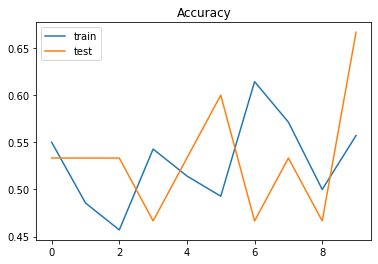

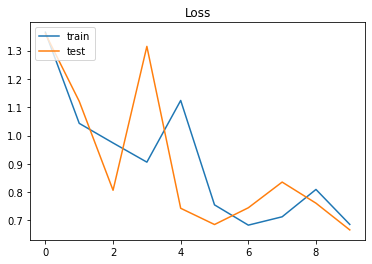

In [ ]:
# 학습 상태를 그래프로 그리기 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

4. CNN 적용하기

In [ ]:
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

# 데이터 읽어 들이기 
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3)

# 데이터를 정규화하기 (flatten을 하지 않음)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)



In [ ]:
# 모델 정의하기 
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))



In [ ]:
#실행 전 GPU 설정
# 모델 컴파일하기
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 학습 실행하기
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=10,
    verbose=1,
    validation_data=(X_test, y_test))



Epoch 1/10
5/5 [==============================] - 2s 210ms/step - loss: 1.4713 - accuracy: 0.4071 - val_loss: 0.7975 - val_accuracy: 0.4833
Epoch 2/10
5/5 [==============================] - 1s 295ms/step - loss: 0.9028 - accuracy: 0.5143 - val_loss: 0.7715 - val_accuracy: 0.5167
Epoch 3/10
5/5 [==============================] - 1s 262ms/step - loss: 0.7875 - accuracy: 0.5286 - val_loss: 0.8440 - val_accuracy: 0.4833
Epoch 4/10
5/5 [==============================] - 1s 149ms/step - loss: 0.7848 - accuracy: 0.5286 - val_loss: 0.7105 - val_accuracy: 0.5167
Epoch 5/10
5/5 [==============================] - 1s 151ms/step - loss: 0.7039 - accuracy: 0.5071 - val_loss: 0.6994 - val_accuracy: 0.5167
Epoch 6/10
5/5 [==============================] - 1s 151ms/step - loss: 0.7296 - accuracy: 0.5071 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 7/10
5/5 [==============================] - 1s 154ms/step - loss: 0.7173 - accuracy: 0.5143 - val_loss: 0.6986 - val_accuracy: 0.5000
Epoch 8/10
5/5 [====

In [ ]:
# 모델 평가하기
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

2/2 [==============================] - 0s 33ms/step - loss: 0.7167 - accuracy: 0.5000
정답률= 0.5 loss= 0.71671462059021
